<h2>Code-Beispiel: Punktoperationen</h2>
<font size="3" face="Verdana">
<p style="text-align:justify">Im folgenden befindet sich eine interaktive Anwendung zur Veranschaulichung von Punktoperationen. </p>
<p style="text-align:justify">Dazu muss jedoch zuerst in den nachstehenden Code-Block geklickt werden und dieser durch drücken der "Run" Taste in der Leiste oben ausgeführt werden. Darunter erscheinen dann Schieberegler mit denen die Parameter der Punktoperation verändert werden können.</p> 
</font>

Originalbild


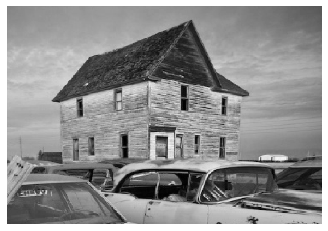

interactive(children=(IntSlider(value=1, description='Kontrast', max=10, style=SliderStyle(description_width='…

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets




def filterKontHell(img, kont, hell):
    img = img*255
    img = kont*img+hell
    img = img/255
    np.clip(img, 0, 1, out=img)
    print("Neues Bild")
    plt.imshow(img, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
    plt.axis("off")
    plt.show()



#read image as grayscale and display it
print("Originalbild")
img = plt.imread('Beispiel_sw.png')
img = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])
plt.imshow(img, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.axis("off")
plt.show()

style = {'description_width': 'initial'}
interact(filterKontHell, img=fixed(img), kont=widgets.IntSlider(min=0, max=10, step=1, value=1, description='Kontrast', style=style), hell=widgets.IntSlider(min=-250, max=250, step=10, value=0, description='Helligkeit', style=style));




<h2>Code-Beispiel: Lineare Filter</h2>
<font size="3" face="Verdana">
<p style="text-align:justify">Im folgenden befindet sich eine interaktive Anwendung zur Veranschaulichung von Filtern mittels Korrelation. </p>
<p style="text-align:justify">Dazu muss jedoch zuerst in den nachstehenden Code-Block geklickt werden und dieser durch drücken der "Run" Taste in der Leiste oben ausgeführt werden. Darunter erscheint dann ein Dropdownn-Menü mit welchem die Art des Filters ausgewählt werden kann.</p> 
<p style="text-align:justify">In diesem Beispiel wird die Methode "Schnitt" verwendet um die Bildkanten zu behandeln. Das heißt die Pixel am Rand, bei denen die Filtemaske über das Bild hinaus geht, werden weggelassen.</p> 
</font>

Originalbild


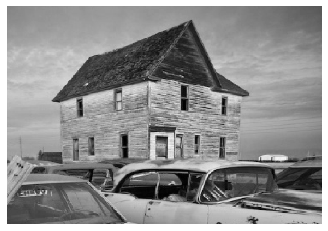

interactive(children=(Dropdown(description='Filter:', options=(('Nichts', 1), ('Glätten', 2), ('Schärfen', 3),…

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def filterImg(img, filt):
    #wähle entsprechende Filtermaske
    mask = np.zeros((3,3))
    #Nichts
    if filt == 1:
        mask = np.array([[0, 0, 0],[0, 1, 0],[0, 0, 0]])
    #Glätten
    if filt == 2:
        mask = np.array([[1/9, 1/9, 1/9],[1/9, 1/9, 1/9],[1/9, 1/9, 1/9]])
    #Schärfen
    if filt == 3:
        mask = np.array([[-1/9, -1/9, -1/9],[-1/9, 2-1/9, -1/9],[-1/9, -1/9, -1/9]])
    #vertikale Kanten
    if filt == 4:
        mask = np.array([[1, 0, -1],[2, 0, -2],[1, 0, -1]])
    #horizontale Kanten
    if filt == 5:
        mask = np.array([[1, 2, 1],[0, 0, 0],[-1, -2, -1]])
    
        
    
    #Filtermaske auf Bild anwenden
    filteredImg = np.zeros((len(img),len(img[0])))
    for i in range(len(img)):
        for j in range(len(img[i])):
            if i>0 and i < len(img)-1 and j>0 and j<len(img[i])-1:
                filteredImg[i,j] = img[i-1, j-1]*mask[0,0] + img[i-1,j]*mask[0,1] + img[i-1,j+1]*mask[0,2] + img[i,j-1]*mask[1,0] + img[i,j]*mask[1,1] + img[i,j+1]*mask[1,2] + img[i+1,j-1]*mask[2,0] + img[i+1,j]*mask[2,1] + img[i+1,j+1]*mask[2,2]
               
   
    #Bildwerte normalisieren
    if filt == 4 or filt == 5:
        img_min = np.min(filteredImg)
        filteredImg[:,:] = filteredImg[:,:]-img_min
        img_max = np.max(filteredImg)
        filteredImg[:,:] = filteredImg[:,:]/img_max
    
    
    np.clip(filteredImg, 0, 1, out=filteredImg)
    print("gefiltertes Bild")
    plt.imshow(filteredImg, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
    plt.axis("off")
    plt.show()



#read image as grayscale and display it
img = plt.imread('Beispiel_sw.png')
img = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])
print("Originalbild")
plt.imshow(img, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.axis("off")
plt.show()

style = {'description_width': 'initial'}
interact(filterImg, img=fixed(img), filt=widgets.Dropdown(options=[('Nichts', 1), ('Glätten', 2), ('Schärfen', 3), ('vertikale Kanten', 4), ('horizontale Kanten', 5)], value=1, description='Filter:',));



<h2>Code-Beispiel: Separierbarkeit</h2>
<font size="3" face="Verdana">
<p style="text-align:justify">Im folgenden befindet sich eine interaktive Anwendung zur Veranschaulichung von Separierbarkeit. </p>
<p style="text-align:justify">Dazu muss jedoch zuerst in den nachstehenden Code-Block geklickt werden und dieser durch drücken der "Run" Taste in der Leiste oben ausgeführt werden. Darunter erscheint dann ein Dropdownn-Menü mit welchem man den Sobel-Filter entweder separiert oder nicht separiert anwenden kann. Unter dem Ergebnisbild kann abgelesen werden wie lange die Anwendung des Filters jeweils gedauert hat.</p> 
</font>

Originalbild


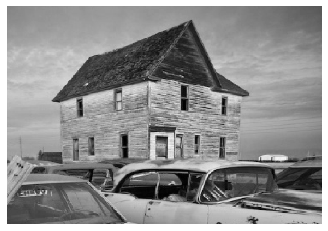

interactive(children=(Dropdown(description='Filter:', options=(('Nicht separiert', 1), ('Separiert', 2)), valu…

In [36]:
import time
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def filterImg(img, filt):
    
    ms_start = int(round(time.time() * 1000))
        
    
    #vertikale Kanten nicht separiert
    if filt == 1:
        mask = np.zeros((3,3))
        mask = np.array([[1, 0, -1],[2, 0, -2],[1, 0, -1]])
         
        #Filtermaske auf Bild anwenden
        filteredImg = np.zeros((len(img),len(img[0])))
        for i in range(len(img)):
            for j in range(len(img[i])):
                if i>0 and i < len(img)-1 and j>0 and j<len(img[i])-1:
                    filteredImg[i,j] = img[i-1, j-1]*mask[0,0] + img[i-1,j]*mask[0,1] + img[i-1,j+1]*mask[0,2] + img[i,j-1]*mask[1,0] + img[i,j]*mask[1,1] + img[i,j+1]*mask[1,2] + img[i+1,j-1]*mask[2,0] + img[i+1,j]*mask[2,1] + img[i+1,j+1]*mask[2,2]
               
        #Bildwerte normalisieren
        img_min = np.min(filteredImg)
        filteredImg[:,:] = filteredImg[:,:]-img_min
        img_max = np.max(filteredImg)
        filteredImg[:,:] = filteredImg[:,:]/img_max
    
        np.clip(filteredImg, 0, 1, out=filteredImg)
        print("gefiltertes Bild")
        plt.imshow(filteredImg, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
        plt.axis("off")
        plt.show()

    #vertikale Kanten separiert
    if filt == 2:
        mask1 = np.array([1, 2, 1])
        mask2 = np.array([1, 0, -1])
        
        #Filtermaske auf Bild anwenden
        filteredImg = np.zeros((len(img),len(img[0])))
        filteredImg_temp = np.zeros((len(img),len(img[0])))
        for i in range(len(img)):
            for j in range(len(img[i])):
                if i>0 and i < len(img)-1 and j>0 and j<len(img[i])-1:
                    filteredImg_temp[i,j] = img[i, j-1]*mask2[0] + img[i,j]*mask2[1] + img[i,j+1]*mask2[2]
       
        for i in range(len(img)):
            for j in range(len(img[i])):
                if i>0 and i < len(img)-1 and j>0 and j<len(img[i])-1:
                    filteredImg[i,j] = filteredImg_temp[i-1, j]*mask1[0] + filteredImg_temp[i,j]*mask1[1] + filteredImg_temp[i+1,j]*mask1[2]
                     
        #Bildwerte normalisieren
        img_min = np.min(filteredImg)
        filteredImg[:,:] = filteredImg[:,:]-img_min
        img_max = np.max(filteredImg)
        filteredImg[:,:] = filteredImg[:,:]/img_max
               
        np.clip(filteredImg, 0, 1, out=filteredImg)
        print("gefiltertes Bild")
        plt.imshow(filteredImg, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
        plt.axis("off")
        plt.show()
        
    ms_end = int(round(time.time() * 1000))
    print("Dauer der Berechnung:")
    print(ms_end-ms_start, 'ms')


#read image as grayscale and display it
img = plt.imread('Beispiel_sw.png')
img = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])
print("Originalbild")
plt.imshow(img, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.axis("off")
plt.show()

style = {'description_width': 'initial'}
interact(filterImg, img=fixed(img), filt=widgets.Dropdown(options=[('Nicht separiert', 1), ('Separiert', 2)], value=1, description='Filter:',));
